In [42]:
# This notebook is scatch work to implement data generation
# 80k set of coco data can be found here: https://pjreddie.com/projects/coco-mirror/

In [43]:
import numpy as np
import torch
from PIL import Image
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Lambda, ToTensor, Resize
import matplotlib.pyplot as plt

import sys
sys.executable

'/Users/aliissaoui/anaconda3/bin/python'

In [44]:
AAKEF_DATA_DIR=r"/Users/aakef/Documents/School/DeepLearning/PerceptualLossNetwork/datasets/MSCOCO"
AAKEF_STYLE_DIR=r"/Users/aakef/Documents/School/DeepLearning/PerceptualLossNetwork/datasets/styles"
sketch = f"{AAKEF_STYLE_DIR}/Cartoon_Sketch.jpg"
BATCH_SIZE = 1
DIM = 256

In [45]:
ALI_DATA_DIR=r"/Users/aliissaoui/Desktop/studies/IIT/spring/CS577/Project/PerceptualLossNetwork/dataset/train_images/"
ALI_STYLE_DIR=r"/Users/aliissaoui/Desktop/studies/IIT/spring/CS577/Project/PerceptualLossNetwork/dataset/train_styles"
sketch = f"{ALI_STYLE_DIR}/mosaic.jpeg"
BATCH_SIZE = 1
DIM = 256

In [46]:
class Generator(object):
    
    ''' 
        DATA_DIR: Path to folder containing folder of images "/root/folder/img.jpg"
        
            - See: https://pytorch.org/vision/stable/datasets.html#imagefolder
        
        BATCH_SIZE: Size of batches yielded by iterator
        
        dim: Desired single integer square dimensions of images
        
    '''
    
    def __init__(self, DATA_DIR:str, BATCH_SIZE:int, dim:int=256):
        self.dir = DATA_DIR
        self.batch_size = BATCH_SIZE
        self.dim = dim
        data_transformer = Compose([
                    Resize((dim, dim)),
                    ToTensor(),
                    Lambda(lambda x: x.mul(dim))
                    ])

        train = ImageFolder(DATA_DIR, data_transformer)
        self.train_loader = DataLoader(train, batch_size=BATCH_SIZE)
    
        
    def __iter__(self):
        return self.train_loader.__iter__()
        

In [53]:
def load_rgb_img(filename:str, dim:int=None, scale:int=None) -> torch.Tensor:
    
    img = Image.open(filename)
    
    # accept dim or scale but but not both, priortize dim    
    if dim:
        img = img.resize((dim, dim), Image.ANTIALIAS)
        
    elif scale:
        img = img.resize((int(img.size[0] / scale), int(img.size[1] / scale)), Image.ANTIALIAS)
    
    img = np.array(img).transpose(2, 0, 1)
    img = torch.from_numpy(img).float()
    return img

def show_image(img:torch.Tensor):
    plt.figure()
    imT = img.permute((1, 2, 0))
    plt.imshow(imT/256, vmin=0, vmax=256)

def show_images(gen:Generator, batches:int=1):
    if batches > 0:
        print(f"Showing {batches} batches of size {gen.batch_size}")
    else:
        print(f"Showing all batches of size {gen.batch_size}")
    
    for bid, (batch, _) in enumerate(gen):
        if bid == batches:
            break
        else:
            for img in batch:
                show_image(img)

torch.Size([2, 3, 256, 256])

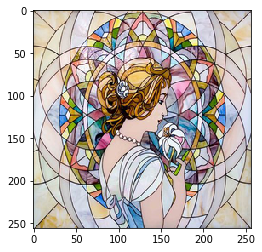

In [66]:
tensor = load_rgb_img(sketch, 256)
show_image(tensor)
tensor.size()

Showing 4 batches of size 1


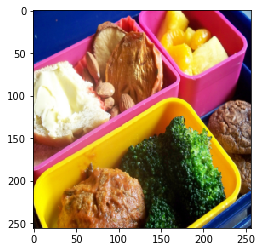

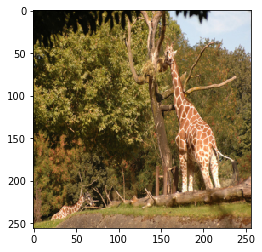

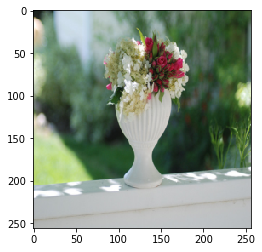

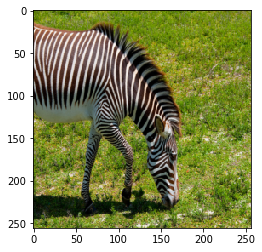

In [51]:
gen = Generator(ALI_DATA_DIR, BATCH_SIZE, dim=DIM)
show_images(gen, batches=4)